In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.model_selection import train_test_split

In [79]:
df=pd.read_csv('forestfires.csv')

In [80]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [81]:
df.drop(['month','day'],axis=1,inplace=True)

In [82]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [83]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [84]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#small=0,large=1
df.loc[df['size_category']=='small','Size_category']=0
df.loc[df['size_category']=='large','Size_category']=1

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [87]:
df['Size_category']=df['Size_category'].astype(int)

In [88]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,Size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,small,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,1,0,small,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,1,0,small,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,small,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,1,0,0,0,0,small,0


<AxesSubplot:>

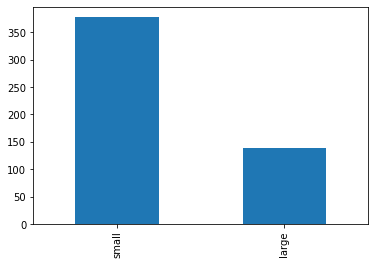

In [89]:
df.size_category.value_counts().plot(kind="bar")

In [60]:
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)

In [62]:
predictors = df.iloc[:,0:28]
target = df.iloc[:,28]


In [63]:
predictors1 = norm_func(predictors)

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)


In [65]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [95]:
y_train = pd.DataFrame(y_train)
    

In [92]:
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.array(x_train),np.array(y_train),epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 1s 1ms/step - loss: 0.6887 - accuracy: 0.6370
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7640
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6982
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.7427
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.7176
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7285
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.7641
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7491
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7368
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7122
Epoch 11/

Epoch 83/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8777
Epoch 84/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8771
Epoch 85/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.8616
Epoch 86/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8778
Epoch 87/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8635
Epoch 88/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.8836
Epoch 89/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8925
Epoch 90/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8775
Epoch 91/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8777
Epoch 92/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8881


12/12 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9700
Epoch 165/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9575
Epoch 166/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9800
Epoch 167/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9360
Epoch 168/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9678
Epoch 169/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9684
Epoch 170/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9733
Epoch 171/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.9568
Epoch 172/500
12/12 [==============================] - 0s 1000us/step - loss: 0.1016 - accuracy: 0.9601
Epoch 173/500
12/12 [==============================] - 0s 998us/step - loss: 0.0881 - accuracy: 0.9668

12/12 [==============================] - 0s 999us/step - loss: 0.0275 - accuracy: 0.9938
Epoch 246/500
12/12 [==============================] - 0s 975us/step - loss: 0.0369 - accuracy: 0.9884
Epoch 247/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9978
Epoch 248/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9788
Epoch 249/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9961
Epoch 250/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9891
Epoch 251/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9813
Epoch 252/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9964
Epoch 253/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9935
Epoch 254/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9919


12/12 [==============================] - 0s 997us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 327/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 328/500
12/12 [==============================] - 0s 997us/step - loss: 0.0293 - accuracy: 0.9875
Epoch 329/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9779
Epoch 330/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 331/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9985
Epoch 332/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9960
Epoch 333/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9991
Epoch 334/500
12/12 [==============================] - 0s 997us/step - loss: 0.0070 - accuracy: 0.9988
Epoch 335/500
12/12 [==============================] - 0s 997us/step - loss: 0.0138 - accuracy: 1.0

12/12 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 408/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 409/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9611
Epoch 410/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 411/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 412/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9963
Epoch 413/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9959
Epoch 414/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 415/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 416/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.9994
Epoc

Epoch 487/500
12/12 [==============================] - 0s 1ms/step - loss: 3.9282e-04 - accuracy: 1.0000
Epoch 488/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9924
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 490/500
12/12 [==============================] - 0s 906us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 491/500
12/12 [==============================] - 0s 997us/step - loss: 0.0696 - accuracy: 0.9724
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 6.5126e-04 - accuracy: 1.0000
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 4.9278e-04 - accuracy: 1.0000
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 6.1398e-04 - accuracy: 1.0000
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9741
Epoch 496/500
12/12 [==============================] - 0s 1ms/step - lo

In [96]:
pred_train = pd.Series([i[0] for i in pred_train])

In [97]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"


In [98]:
train = pd.concat([x_train,y_train],axis=1)
train["Size_category"].value_counts()

0    264
1     97
Name: Size_category, dtype: int64

In [100]:
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["Size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) #100%
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))


original_class,large,small
row_0,,
large,97,1
small,0,263


In [102]:
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["Size_category"]==1,"original_class"] = "large"

In [103]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) 
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,27,10
small,15,104


<AxesSubplot:xlabel='original_class'>

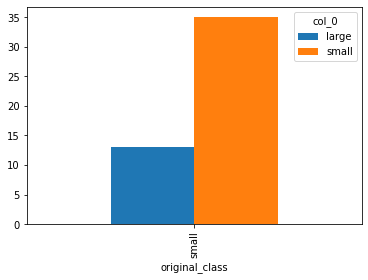

In [110]:
pd.crosstab(test.original_class,pred_test_class).plot(kind="bar")